In [1]:
from emutils.imports import *
from emutils.utils import (
    attrdict,
    in_ipynb,
    pandas_max,
    load_pickle,
    save_pickle,
)
import statsmodels
import statsmodels.stats.proportion
from emutils.plt.style import activate_latex, deactivate_latex
import matplotlib.ticker as mtick

activate_latex()

from utils import *

# Suppress warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Suppress scientific notation
np.seterr(all='raise')

pandas_max(100, 200)

sns.set_style("whitegrid")
sns.color_palette("rocket", as_cmap=True)

Python  3.6.13
Python Executable: /home/ubuntu/anaconda3/envs/cfshap22/bin/python
CWD =  /home/ubuntu/air/xai/cfshap-release/cf-shap-facct22
NumPy 1.19.2 | Pandas 1.1.5 | SciPy 1.5.2 | NetworkX 2.5.1 | StatsModels 0.12.2
scikit-learn 0.24.2 | xgboost 1.3.3 
MatPlotLib 3.3.4 | Seaborn 0.11.1 | 

In [2]:
from constants import DATA_DIR, MODEL_DIR, RESULTS_DIR, EXPORT_DIR

parser = ArgumentParser(sys.argv)

parser.add_argument('--data_path', type=str, default=DATA_DIR, required=False)
parser.add_argument('--results_path', type=str, default=RESULTS_DIR)
parser.add_argument('--export_path', type=str, default=EXPORT_DIR)

parser.add_argument('--override', dest='override', action='store_true', default=False)

args, unknown = parser.parse_known_args()
args = attrdict(vars(args))

os.makedirs(args.export_path, exist_ok=True)

# Show graphs and stuff or not?
args.show = in_ipynb()

print(args)

# -> Results
def result_filename(result_name, dataset, data_version, model_version, results_version, ext='pkl'):
    DATA_RUN_NAME = f"{dataset}_D{data_version}"
    MODEL_RUN_NAME = f"{DATA_RUN_NAME}M{model_version}_xgb"
    return f"{args.results_path}/{MODEL_RUN_NAME}_{result_name}{results_version}.{ext}"

{'data_path': './data',
 'export_path': './export',
 'override': False,
 'results_path': './results',
 'show': True}


In [3]:
MODELS = [
    ('heloc', 'v2', 'v5'),
    ('lendingclub', 'v2', 'v5'),
    ('wines', 'v2', 'v5'),
]

RESULTS = [
    'v5_close',
    'v5_far',
]

def load_results(experiment_name):
    results_ = {}
    
    for dataset, data_version, model_version in tqdm(MODELS):
        for results_version in RESULTS:
            model_name = model_version_to_name(model_version)
            dataset_name = dataset_to_name(dataset)
            result_name = result_version_to_name(results_version)
            filename = result_filename(experiment_name,
                                       results_version=results_version,
                                       data_version=data_version,
                                       model_version=model_version,
                                       dataset=dataset)
            
            if not os.path.exists(filename):
                warnings.warn(
                    f'Could not load {experiment_name.upper()} results for {dataset_name} / {model_name} / {result_name}'
                )
            else:
                results_[(dataset_name, model_name, result_name)] = load_pickle(filename)

    print(f'Done {experiment_name.upper()}.')
    return results_

In [4]:
cdf = load_results('costs')
list(cdf.keys())

  0%|          | 0/3 [00:00<?, ?it/s]

[2022-09-11 23:14:07] INFO:	 Loading PICKLE from ./results/heloc_Dv2Mv5_xgb_costsv5_close.pkl...
[2022-09-11 23:14:08] INFO:	 Load done in 0.173 seconds.
[2022-09-11 23:14:08] INFO:	 Loading PICKLE from ./results/heloc_Dv2Mv5_xgb_costsv5_far.pkl...
[2022-09-11 23:14:08] INFO:	 Load done in 0.167 seconds.
[2022-09-11 23:14:08] INFO:	 Loading PICKLE from ./results/lendingclub_Dv2Mv5_xgb_costsv5_close.pkl...
[2022-09-11 23:14:08] INFO:	 Load done in 0.1609 seconds.
[2022-09-11 23:14:08] INFO:	 Loading PICKLE from ./results/lendingclub_Dv2Mv5_xgb_costsv5_far.pkl...
[2022-09-11 23:14:08] INFO:	 Load done in 0.1589 seconds.
[2022-09-11 23:14:08] INFO:	 Loading PICKLE from ./results/wines_Dv2Mv5_xgb_costsv5_close.pkl...
[2022-09-11 23:14:08] INFO:	 Load done in 0.1353 seconds.
[2022-09-11 23:14:08] INFO:	 Loading PICKLE from ./results/wines_Dv2Mv5_xgb_costsv5_far.pkl...
[2022-09-11 23:14:08] INFO:	 Load done in 0.132 seconds.
Done COSTS.


[('HELOC (Home Equity Line of Credit)', 'Non-Monotonic', 'Close (<50%)'),
 ('HELOC (Home Equity Line of Credit)', 'Non-Monotonic', 'Far (>50%)'),
 ('Lending Club (2007-2018)', 'Non-Monotonic', 'Close (<50%)'),
 ('Lending Club (2007-2018)', 'Non-Monotonic', 'Far (>50%)'),
 ('Wine Quality (White)', 'Non-Monotonic', 'Close (<50%)'),
 ('Wine Quality (White)', 'Non-Monotonic', 'Far (>50%)')]

In [5]:
nndf = load_results('nns')
list(nndf.keys())

  0%|          | 0/3 [00:00<?, ?it/s]

[2022-09-11 23:14:08] INFO:	 Loading PICKLE from ./results/heloc_Dv2Mv5_xgb_nnsv5_close.pkl...
[2022-09-11 23:14:08] INFO:	 Load done in 0.1024 seconds.
[2022-09-11 23:14:08] INFO:	 Loading PICKLE from ./results/heloc_Dv2Mv5_xgb_nnsv5_far.pkl...
[2022-09-11 23:14:09] INFO:	 Load done in 0.0802 seconds.
[2022-09-11 23:14:09] INFO:	 Loading PICKLE from ./results/lendingclub_Dv2Mv5_xgb_nnsv5_close.pkl...
[2022-09-11 23:14:09] INFO:	 Load done in 0.085 seconds.
[2022-09-11 23:14:09] INFO:	 Loading PICKLE from ./results/lendingclub_Dv2Mv5_xgb_nnsv5_far.pkl...
[2022-09-11 23:14:09] INFO:	 Load done in 0.0838 seconds.
[2022-09-11 23:14:09] INFO:	 Loading PICKLE from ./results/wines_Dv2Mv5_xgb_nnsv5_close.pkl...
[2022-09-11 23:14:09] INFO:	 Load done in 0.0712 seconds.
[2022-09-11 23:14:09] INFO:	 Loading PICKLE from ./results/wines_Dv2Mv5_xgb_nnsv5_far.pkl...
[2022-09-11 23:14:09] INFO:	 Load done in 0.0652 seconds.
Done NNS.


[('HELOC (Home Equity Line of Credit)', 'Non-Monotonic', 'Close (<50%)'),
 ('HELOC (Home Equity Line of Credit)', 'Non-Monotonic', 'Far (>50%)'),
 ('Lending Club (2007-2018)', 'Non-Monotonic', 'Close (<50%)'),
 ('Lending Club (2007-2018)', 'Non-Monotonic', 'Far (>50%)'),
 ('Wine Quality (White)', 'Non-Monotonic', 'Close (<50%)'),
 ('Wine Quality (White)', 'Non-Monotonic', 'Far (>50%)')]

### Merge ALL results together

In [6]:
def generate_closenfar_result(results_, delcols, nindex_cols, drop = True):
    
    for dataset, model_name in set(tuple(map(tuple, np.array(tuple(results_.keys()))[:, :-1]))):
        if (dataset, model_name, 'Close (<50%)') in results_ and (dataset, model_name, 'Far (>50%)') in results_:
            
            A = results_[(dataset, model_name, 'Close (<50%)')]
            B = results_[(dataset, model_name, 'Far (>50%)')]
            
            if not drop:
                A = A.copy()
                B = B.copy()
                
            if np.all(A.columns.values == B.columns.values) and A.shape == B.shape:
                index_cols = list(set(A.columns.values) - set(delcols) - set(nindex_cols))
                for c in delcols:
                    if c in A:
                        del A[c]
                    if c in B:
                        del B[c]
                        
                A = A.sort_values(index_cols)
                B = B.sort_values(index_cols)
                col = nindex_cols[0]

                if np.all(A[index_cols].values == B[index_cols].values):
                    print(f'Generating aggregation for {dataset} / {model_name}')
                    C = A[index_cols].copy()
                    C[col] = [np.concatenate([a, b]) for a, b in zip(A[col].values, B[col].values)]
                    C['len'] = C[col].apply(len)
                    C['failure'] = C[col].apply(failure_nan)
                    C['mean'] = C[col].apply(safe_mean)

                    results_[(dataset, model_name, 'All')] = C
                    if drop:
                        del results_[(dataset, model_name, 'Close (<50%)')]
                        del results_[(dataset, model_name, 'Far (>50%)')]
                else:
                    logging.error(f'Problem at sorting level. {(dataset, model_name)}')
            else:
                logging.error(f'Problem at shape level. {(dataset, model_name)}')
                print('Shapes:', A.shape, B.shape)
                print('Columns:', np.all(A.columns.values == B.columns.values))
                display(A.method.unique())
                display(B.method.unique())

        else:
            logging.warning(f'Could not find both CLOSE n FAR. {(dataset, model_name)}')
    return results_

In [7]:
delcols = ['mean', 'mean_pad', 'failure', 'costs_pad', 'xNN']

In [8]:
cdf = generate_closenfar_result(cdf, delcols = delcols, nindex_cols = ['costs'])
list(cdf.keys())

Generating aggregation for HELOC (Home Equity Line of Credit) / Non-Monotonic
Generating aggregation for Lending Club (2007-2018) / Non-Monotonic
Generating aggregation for Wine Quality (White) / Non-Monotonic


[('HELOC (Home Equity Line of Credit)', 'Non-Monotonic', 'All'),
 ('Lending Club (2007-2018)', 'Non-Monotonic', 'All'),
 ('Wine Quality (White)', 'Non-Monotonic', 'All')]

In [9]:
nndf = generate_closenfar_result(nndf, delcols = delcols, nindex_cols = ['NN'])
list(nndf.keys())

Generating aggregation for HELOC (Home Equity Line of Credit) / Non-Monotonic
Generating aggregation for Lending Club (2007-2018) / Non-Monotonic
Generating aggregation for Wine Quality (White) / Non-Monotonic


[('HELOC (Home Equity Line of Credit)', 'Non-Monotonic', 'All'),
 ('Lending Club (2007-2018)', 'Non-Monotonic', 'All'),
 ('Wine Quality (White)', 'Non-Monotonic', 'All')]

# Results Pre-processing

In [10]:
from joblib import Parallel, delayed
from emutils.parallel.utils import max_cpu_count

parallel = Parallel(n_jobs = min(64, max_cpu_count() - 1))

In [11]:
def safe_proportion(a, strict=False, sign='>='):
    a = a.copy()
    if strict:
        assert np.isnan(a).sum() == 0
    a = a[~np.isnan(a)]
    if sign == '>=':
        count = (a >= 0).sum()
    elif sign == '><' or sign == '<>':
        count = (a > 0).sum() - (a < 0).sum()
    else:
        raise ValueError('Invalid sign.')
    nobs = len(a)
    cl, cr = statsmodels.stats.proportion.proportion_confint(count, nobs)
    return count / nobs, (cr - cl) / 2


def compute_proportion(dif, **kwargs):
    return np.array([[safe_proportion(b, **kwargs) for b in a] for a in dif])

def compute_dif_safe(vals):
    # NaN are infinite cost
    vals = np.nan_to_num(vals, nan=np.inf)

    # Let's do the difference (we have to ignore inf - inf = nan)
    C = np.expand_dims(vals, axis=1) - np.expand_dims(vals, axis=0)

    # The difference is NaN if both are NaN: we set it to zero
    C = np.nan_to_num(C, nan=0)
    return C


def pivot_to_proportions(df, pivot_sig, sign):
    # Delete 1 dimension
    def explode_(x):
        if isinstance(x, (np.ndarray, list)) and isinstance(x[0], (np.ndarray, list)):
            return x[0]
        else:
            return x

    pivot_sig = pivot_sig.apply(lambda s: s.apply(explode_))

    experiments = list(pivot_sig.columns.values)

    prev_err_cfg = np.seterr(invalid='ignore')
    difs_safe = {
        c: compute_dif_safe(
            np.vstack(pivot_sig[c].values[pivot_sig[c].apply(lambda x: not isinstance(x, float) or not np.isnan(x))]))
        for c in experiments
    }
    np.seterr(**prev_err_cfg)

    prop = dict(
        parallel(
            delayed(lambda c, dif: (c, compute_proportion(dif, strict=True, sign=sign)))(k, v)
            for k, v in tqdm(difs_safe.items())))
    prop_ci = {c: p[:, :, 1] for c, p in prop.items()}
    prop = {c: p[:, :, 0] for c, p in prop.items()}

    return pivot_sig, prop, prop_ci

## Precompute -  Costs

In [12]:
def costs_to_proportion(cdf, sign=">="):
    # Convert into a pivot table (per method/baseline)
    pivot_sig = pd.pivot_table(
        cdf,
        values='costs',
        index=['type', 'method', 'action_direction'],  # <- Trend now here
        columns=[
            'action_normalization',
            'action_aggregation',
            'action_strategy',
            #             'action_direction',
            'cost_normalization',
            'cost_aggregation',
            'k',
        ],
        aggfunc=lambda X: X.values,
    )
    return pivot_to_proportions(cdf, pivot_sig, sign)

In [13]:
pivot_sig2, prop2, prop_ci2 = dict(), dict(), dict()
    
for name in cdf.keys():
    pivot_sig2[name], prop2[name], prop_ci2[name] = costs_to_proportion(cdf[name], sign = '><')

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

## Precompute - NN

In [14]:
def nn_to_proportions(ynndf, sign):
    # Convert into a pivot table (per method/baseline)
    pivot_sig = pd.pivot_table(
        ynndf,
        values='NN',
        index=['type', 'method', 'action_direction'],  # The trend is part of the index now
        columns=[
            'action_normalization',
            'action_aggregation',
            'action_strategy',
            'cost_normalization',
            'cost_aggregation',
            'k',
            'topk',
        ],
        aggfunc=lambda X: X.values,
    )
    return pivot_to_proportions(ynndf, pivot_sig, sign)

In [15]:
pivot_sig_nn2, prop_nn2, prop_ci_nn2 = {}, {}, {}

for name in nndf.keys():
    pivot_sig_nn2[name], prop_nn2[name], prop_ci_nn2[name] = nn_to_proportions(nndf[name], sign = '><')

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

# Export Results

### Number of samples

In [16]:
def safe_len(x):
    try:
        return len(x)
    except:
        return -1

def compute_sizes(pivot_sig):
    def _compute_size(pivot_sig_):
        sizes_ = pivot_sig_.apply(lambda s: s.apply(safe_len)).values
        max_size = sizes_.max()
        assert np.all((sizes_ == max_size) | (sizes_ == -1))
        return max_size

    return {name: _compute_size(pivot_sig_) for name, pivot_sig_ in pivot_sig.items()}

In [17]:
compute_sizes(pivot_sig2)

{('HELOC (Home Equity Line of Credit)', 'Non-Monotonic', 'All'): 4000,
 ('Lending Club (2007-2018)', 'Non-Monotonic', 'All'): 4000,
 ('Wine Quality (White)', 'Non-Monotonic', 'All'): 2996}

In [18]:
compute_sizes(pivot_sig_nn2)

{('HELOC (Home Equity Line of Credit)', 'Non-Monotonic', 'All'): 4000,
 ('Lending Club (2007-2018)', 'Non-Monotonic', 'All'): 4000,
 ('Wine Quality (White)', 'Non-Monotonic', 'All'): 2996}

## Plots

In [19]:
def print_nonunique_cols(df_, exclude_cols):
    for col in df_:
        if col not in exclude_cols:
            u = df_[col].unique()
            if len(u) > 1:
                print(col, u)

In [20]:
def __is_value_ok(v, f):
    if f is None:
        return True
    elif v == f:
        return True
    else:
        return False

def is_tuple_ok(t, filter_tuple):
    return all([__is_value_ok(v, f) for v, f in zip(t, filter_tuple)])

def filter_dict(d, filter_tuple):
    def __filter_tuple(t):
        return tuple([v for v, f in zip(t, filter_tuple) if f is None])

    return {__filter_tuple(t): data for t, data in d.items() if is_tuple_ok(t, filter_tuple)}

def select_data_to_plot(
    matrices_dict,
    pivotname,
    selected_methods_tuples,
    selected_baselines_tuples,
    fixed_features,
    metric_name,
    method_details,
    feature_names,
):
    
    methods_names = [method_to_name(method, trend = method_details, norm = method_details, details=method_details) for method in selected_methods_tuples]
    baselines_names = [method_to_name(method, trend = method_details, norm = method_details, details=method_details) for method in selected_baselines_tuples]

    # print('Methods/Baselines Names', methods_names, baselines_names)
    
    methods_tuples = pivotname.iloc[:, np.array([is_tuple_ok(k, fixed_features) for k in pivotname.columns.values])].dropna().index.values
    
    def get_methods_ids(selected_methods_tuples):
        return np.array([np.argwhere([m == m_ for m_ in methods_tuples]) for m in selected_methods_tuples]).flatten()
    
    methods_index = get_methods_ids(selected_methods_tuples)
    baselines_index = get_methods_ids(selected_baselines_tuples)
    
    # print('(All Available) Methods Tuples', methods_tuples)
    # print('Selected Methods Tuples', selected_methods_tuples)
    # print('Selected Baselines Tuples', selected_baselines_tuples)
    # print('Indices', methods_index, baselines_index)
    
    float_index = [i for i, x in enumerate(fixed_features) if x is None]
    fixed_index = [i for i, x in enumerate(fixed_features) if x is not None]
    float_names = feature_names[float_index]
    fixed_names = feature_names[fixed_index]
    
    selected_matrices_dict = matrices_dict
    
    
    selected_matrices_dict = filter_dict(selected_matrices_dict, fixed_features)
    
    for k, v in selected_matrices_dict.items():
        assert v.shape[0] == len(methods_tuples), f"{v.shape} / {len(methods_tuples)}"
        assert v.shape[1] == len(methods_tuples), f"{v.shape} / {len(methods_tuples)}"
    
    selected_matrices_dict = {k: M[baselines_index][:, methods_index] for k, M in selected_matrices_dict.items()}
    shape = selected_matrices_dict[list(selected_matrices_dict.keys())[0]].shape
    
    df_ =  pd.DataFrame(
        [
            {
                **{
                    'Baseline': baselines_names[b],
                    'Method': methods_names[m],
                    metric_name: selected_matrices_dict[floats][b, m]
                },
                **{
                    float_name: float_value
                    for float_name, float_value in zip(float_names, floats)
                }
            }
            for b in range(shape[0]) for m in range(shape[1]) for floats in selected_matrices_dict.keys()
        ]
    )
    return df_


def generate_dataframe_to_plot(pivot_sig, prop, prop_ci = None, sizes=None, metric_name = "M > B", **kwargs):
    df_ = dict()
    for name in prop.keys():
        df_[name] = select_data_to_plot(matrices_dict = prop[name], metric_name=metric_name, pivotname = pivot_sig[name], **kwargs)
        # display(df_[name])
        df_[name]['CI'] = select_data_to_plot(matrices_dict = prop_ci[name], metric_name='CI', pivotname = pivot_sig[name], **kwargs)['CI'] if prop_ci is not None else 0
        
    for k in df_:
        df_[k]['Dataset'] = k[0]
        df_[k]['Model'] = k[1]
        df_[k]['Decision Boundary'] = k[2]
        df_[k]['#XPs'] = sizes[k] if sizes is not None else np.nan
        
    df_ = pd.concat(list(df_.values()), axis = 0)
    return df_

In [21]:
def camera_custom_plot(data, x, y, ci=None, hue=None, style=None):
    ax = plt.gca()

    us = data[style].unique() if style is not None else [None]
    markers = get_markers(len(us))
    for s, marker in zip(us, markers):
        uh = data[hue].unique() if hue is not None else [None]
        colors = get_colors(len(uh))
        for h, color in zip(uh, colors):
            data_ = data.copy()
            if hue is not None:
                data_ = data_[data_[hue] == h]
            if style is not None:
                data_ = data_[data_[style] == s]
            label = None
            if s is not None:
                label = s
            if h is not None:
                if label is None:
                    label = h
                else:
                    if hue != style:
                        label += ' - ' + h

            if len(data_) > 0:
                kwargs = dict(
                    x=data_[x].values,
                    y=data_[y].values,
                    yerr=data_[ci].values if ci is not None else None,
                    color=color,
                    marker=marker,
                    markersize=4,
                )

                plt.errorbar(**kwargs, linewidth=.5, alpha=.2)
                plt.errorbar(**kwargs,
                             linewidth=0,
                             label=label.replace('%', '\%').replace('<', '$<$').replace('>', '$>$'))


def camera_figure(
    df_,
    x="k",
    y='Metric Name',
    style="Baseline",  #"Decision Boundary",
    hue="Baseline",
    ci="CI",
    col='Method',
    row=None,  #"Model",
    figure='Dataset',
    filename=None,
    width=2.75,
    ratio=2.25,
    show_table=True,
    ylabel_font=11,
    ylabel_pad=10,
    xlabel_font=11,
    ticks_font=11,
    suptitle_font=13,
    title_font=12,
    detached_legend=True,
    legend_font=10,
    ret_table=False,
):

    ylim = np.array(
        (df_[y].min() - (df_[y].max() - df_[y].min()) / 20, df_[y].max() + (df_[y].max() - df_[y].min()) / 20))
    ylim = ylim / .25
    ylim = ylim * .25

    tables = []
    figures = df_[figure].unique() if figure is not None else [None]
    for figure_name in figures:
        df__ = df_[df_[figure] == figure_name].copy() if figure_name is not None else df_.copy()
        cols = df__[col].unique() if col is not None else [None]
        rows = df__[row].unique() if row is not None else [None]
        fig, axs = plt.subplots(len(rows),
                                len(cols),
                                sharex=True,
                                sharey=True,
                                figsize=(len(cols) * width, len(rows) * width / ratio),
                                dpi=100,
                                gridspec_kw=dict(wspace=0.05, hspace=.1))
        for i, c in enumerate(cols):
            for j, r in enumerate(rows):
                df___ = df__.copy()
                if c is not None:
                    df___ = df___[df___[col] == c]
                if r is not None:
                    df___ = df___[df___[row] == r]
                if len(rows) == 1 and len(cols) == 1:
                    plt.sca(axs)
                elif len(rows) == 1:
                    plt.sca(axs[i])
                elif len(cols) == 1:
                    plt.sca(axs[j])
                else:
                    plt.sca(axs[j, i])
                camera_custom_plot(
                    data=df___,
                    x=x,
                    y=y,
                    style=style,
                    hue=hue,
                    ci=ci,
                    #                     legend=(i == 0) and (j == 0),
                )
                xts = np.arange(1, len(df___[x].unique()) + 1)
                plt.xticks(xts, fontsize=ticks_font)
                #                 plt.xticks(xts, ["$\\bm{" + str(i) + "}$" for i in xts], fontsize = 13)
                plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
                if j == 0:
                    plt.title(c, fontsize=title_font)
                if ylim[1] - ylim[0] > 1.2:
                    yticks = [t for t in np.arange(-1, 1 + .5, .5) if t > ylim[0] and t < ylim[1]]
                    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
                elif ylim[1] - ylim[0] > .6:
                    yticks = [t for t in np.arange(-1, 1 + .25, .25) if t > ylim[0] and t < ylim[1]]
                    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
                else:
                    yticks = [t for t in np.arange(-1, 1 + .125, .125) if t > ylim[0] and t < ylim[1]]
                    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
                plt.yticks(yticks, fontsize=ticks_font)
                if 'r' in y:
                    plt.gca().set_facecolor((.995, 1.00, 1.00))
                if 'p' in y:
                    plt.gca().set_facecolor((1, 1, 0.995))
                if j == len(rows) - 1:
                    plt.xlabel(x, fontsize=xlabel_font)
                if i == 0:
                    if len(rows) > 1:
                        if j == int(np.floor(len(rows) / 2)):
                            plt.ylabel(y.replace('%', '\%'), fontsize=ylabel_font, labelpad=ylabel_pad, loc='bottom')

                    else:
                        plt.ylabel(y.replace('%', '\%'), fontsize=ylabel_font, labelpad=ylabel_pad)
                if i == len(cols) - 1:
                    if len(rows) > 1:
                        ax = plt.gca()
                        plt.sca(plt.gca().twinx())
                        plt.ylabel(r)
                        plt.tick_params(
                            axis='y',  # changes apply to the x-axis
                            which='both',  # both major and minor ticks are affected
                            right=False,  # ticks along the top edge are off
                            labelright=False)  # labels along the bottom edge are off
                        plt.sca(ax)

        plt.ylim(*ylim)
        if figure_name is not None:
            plt.suptitle(figure_name, fontsize=suptitle_font, y=1.30 - .15 * (len(rows) - 1))

        # Create legend
        plt.legend(
            title="Baselines",
            bbox_to_anchor=(1.1 + (len(rows) > 1) * .3, 1),
            handletextpad=.2,
            fontsize=legend_font,
            title_fontsize=legend_font + 1,
        )
        # Remove legend
        if detached_legend:
            lgn = plt.gca().get_legend_handles_labels()
            plt.gca().get_legend().remove()

        # Show/Save main figure
        if filename is not None:
            fig_name = str(figure_name)[:4] if len(figures) > 1 else 'None'
            plt.savefig(f"export/{filename}_{fig_name}.svg", bbox_inches='tight', pad_inches=0)
        plt.show()

        #         display(df__)
        if show_table:
            table = (pd.pivot_table(df__,
                                    columns=[c for c in [col, x] if c is not None],
                                    index=[c for c in [row, style] if c is not None],
                                    values=y) * 100).round(1)
            #             table = table.loc[df__['Method'].unique()]
            pandas_max(200, 200)
            display(table)
            tables.append(table)

        # Legend Figure
        if detached_legend:
            plt.figure(figsize=(len(cols) * 4, 1.25))
            plt.legend(
                *lgn,
                title="Baselines",
                # bbox_to_anchor=(1.1, 1),
                loc='center',
                ncol=3,
                columnspacing=0.75,
                handletextpad=.05,
            )
            plt.gca().axis('off')
            if filename is not None:
                plt.savefig(f"export/{filename}_{fig_name}_legend.svg", bbox_inches='tight', pad_inches=0)

        plt.show()
    if ret_table:
        return tables



What we want to plot

In [22]:
# Let's select what method we want to plot

KWARGS = dict(
    selected_baselines_tuples=[
        ('SHAP', 'training_100', 'global'),
        ('SHAP', 'diff_pred_100', 'global'),
        ('SHAP', 'diff_label_100', 'global'),
    ],
    selected_methods_tuples=[
        ('SHAP', 'knn100_qL1', 'local'),
    ],
    method_details = False,
)

### Main Text - Counterfactual-Ability

In [23]:
FEATURE_NAMES_COSTS = np.array([
    'Action Normalization',
    'Action Aggregation',
    'Action Strategy',
    'Cost Normalization',
    'Cost Aggregation',
    'k',
])

Baseline ['SHAP TRAIN' 'SHAP D-PRED' 'SHAP D-LAB']
k [1 2 3 4 5]
Dataset ['HELOC' 'Lending Club' 'Wine Quality']


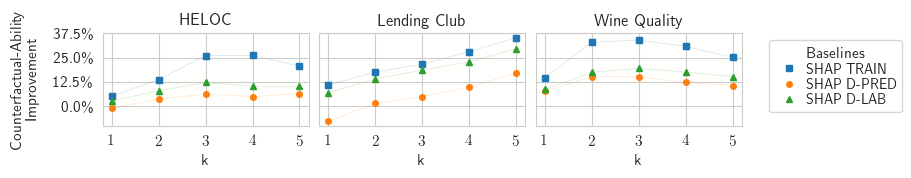

Dataset     HELOC                         Lending Club                    \
k               1     2     3     4     5            1     2     3     4   
Baseline                                                                   
SHAP D-LAB    2.8   8.0  12.3  10.3  10.3          7.1  14.2  18.6  23.0   
SHAP D-PRED  -1.0   3.7   6.3   5.1   6.6         -7.8   1.6   5.0   9.8   
SHAP TRAIN    5.4  13.8  26.2  26.2  20.8         11.0  17.5  21.7  28.1   

Dataset           Wine Quality                          
k               5            1     2     3     4     5  
Baseline                                                
SHAP D-LAB   29.6          8.7  17.5  19.5  17.7  15.3  
SHAP D-PRED  17.1          7.9  15.3  15.2  12.3  10.7  
SHAP TRAIN   35.4         14.8  33.0  34.0  30.8  25.2

In [24]:
# Settings
KWARGS['metric_name'] = 'Counterfactual-Ability\nImprovement'
KWARGS_PLOT = dict(
    y = KWARGS['metric_name'],
    figure=None,
    col='Dataset',    
    detached_legend=False,
)

# DataFrame
df_ = generate_dataframe_to_plot(
    pivot_sig2, prop2, prop_ci2, 
    fixed_features = ('quantile_sum', 'L1', 'random', 'quantile', 'L1', None),
    feature_names = FEATURE_NAMES_COSTS,
    **KWARGS
)
df_ = df_[(df_['Decision Boundary'] == 'All')]
df_['Dataset'] = df_['Dataset'].apply(lambda x : x.split('(')[0][:-1])
print_nonunique_cols(df_, ['CI', KWARGS['metric_name']])

# Plot
camera_figure(df_, filename = 'costs_random_2', **KWARGS_PLOT)

#### Plausibility - Main Text

In [25]:
FEATURE_NAMES_NN = np.array([
    'Action Normalization',
    'Action Aggregation',
    'Action Strategy',
    #     'Action Direction',
    'Cost Normalization',
    'Cost Aggregation',
    'K',
    'k',
])

Baseline ['SHAP TRAIN' 'SHAP D-PRED' 'SHAP D-LAB']
k [1 2 3 4 5]
Dataset ['HELOC' 'Lending Club' 'Wine Quality']


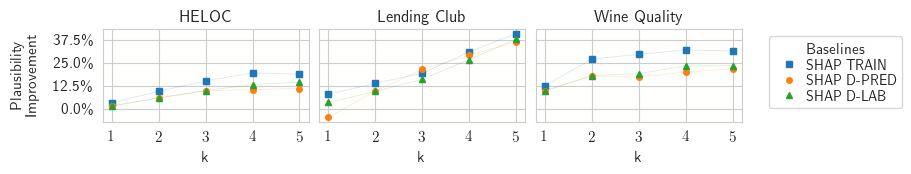

Dataset     HELOC                        Lending Club                          \
k               1    2     3     4     5            1     2     3     4     5   
Baseline                                                                        
SHAP D-LAB    1.6  5.9   9.9  13.2  14.6          3.5   9.4  16.1  26.7  37.8   
SHAP D-PRED   1.5  6.1   9.8  10.5  11.0         -4.7   9.6  21.5  29.1  36.4   
SHAP TRAIN    3.4  9.5  15.2  19.6  18.8          7.9  13.9  19.4  31.0  40.9   

Dataset     Wine Quality                          
k                      1     2     3     4     5  
Baseline                                          
SHAP D-LAB           9.9  18.1  19.2  23.3  23.4  
SHAP D-PRED          9.7  17.9  17.2  20.1  21.8  
SHAP TRAIN          12.7  27.1  29.6  32.1  31.5

In [26]:
# Settings
KWARGS['metric_name'] = 'Plausibility\nImprovement'
KWARGS_PLOT['y'] = KWARGS['metric_name']

# DataFrame
df_ = generate_dataframe_to_plot(
    pivot_sig_nn2, prop_nn2, prop_ci_nn2,
    fixed_features = ('quantile_sum', 'L1', 'random', 'quantile', 'L1', 5, None), 
    feature_names = FEATURE_NAMES_NN,
    **KWARGS
)
df_ = df_[(df_['Decision Boundary'] == 'All')]
df_ = df_[df_['Dataset'].apply(lambda x : 'GMSC' not in x)]
df_['Dataset'] = df_['Dataset'].apply(lambda x : x.split('(')[0][:-1])
print_nonunique_cols(df_, ['CI', KWARGS['metric_name']])

# Plot
camera_figure(df_, filename = 'plausability_random_2', **KWARGS_PLOT)

### Appendix - KNN* - Projected over the DB

Baseline ['SHAP TRAIN' 'SHAP D-PRED' 'SHAP D-LAB']
Method ['CF-SHAP\n$100$-NN' 'CF-SHAP\n$100$-NN$^*$']
k [1 2 3 4 5]
Dataset ['HELOC' 'Lending Club' 'Wine Quality']


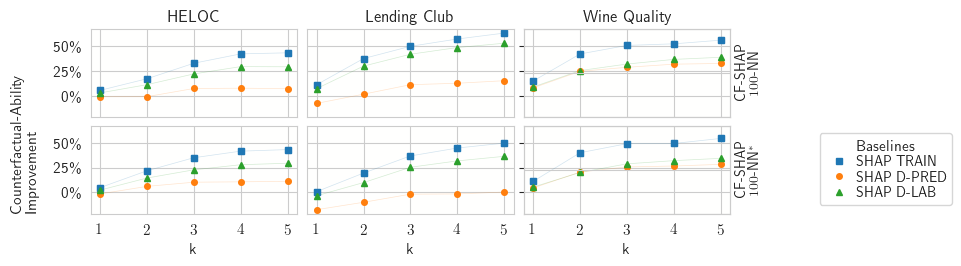

Dataset                           HELOC                         Lending Club  \
k                                     1     2     3     4     5            1   
Method                Baseline                                                 
CF-SHAP\n$100$-NN     SHAP D-LAB    2.8  11.1  21.9  29.2  29.1          7.1   
                      SHAP D-PRED  -1.0  -1.0   7.2   7.5   7.2         -7.8   
                      SHAP TRAIN    5.4  17.0  32.6  42.1  43.2         11.0   
CF-SHAP\n$100$-NN$^*$ SHAP D-LAB    2.2  14.4  22.7  27.8  29.3         -3.4   
                      SHAP D-PRED  -1.6   6.0  10.2  10.6  11.0        -17.4   
                      SHAP TRAIN    4.8  21.7  34.8  41.5  43.0          0.7   

Dataset                                                   Wine Quality        \
k                                     2     3     4     5            1     2   
Method                Baseline                                                 
CF-SHAP\n$100$-NN     SHAP D-LAB   29.8  41.7  48.4  52.8          8.7  25.3   
                      SHAP D-PRED   1.5  11.0  12.5  15.0          7.9  24.6   
                      SHAP TRAIN   37.4  49.7  57.0  63.0         14.8  42.0   
CF-SHAP\n$100$-NN$^*$ SHAP D-LAB    9.8  25.2  31.6  36.2          5.3  20.0   
                      SHAP D-PRED -10.0  -1.8  -1.6   0.3          4.4  20.5   
                      SHAP TRAIN   19.4  36.6  44.6  49.6         11.0  39.9   

Dataset                                              
k                                     3     4     5  
Method                Baseline                       
CF-SHAP\n$100$-NN     SHAP D-LAB   31.8  36.5  38.7  
                      SHAP D-PRED  28.6  31.7  32.4  
                      SHAP TRAIN   50.6  52.2  55.9  
CF-SHAP\n$100$-NN$^*$ SHAP D-LAB   28.7  31.9  34.2  
                      SHAP D-PRED  25.6  26.5  28.2  
                      SHAP TRAIN   49.0  49.2  54.3

In [27]:
# Settings
KWARGS['metric_name'] = 'Counterfactual-Ability\nImprovement'
selected_methods_tuples_cache = KWARGS['selected_methods_tuples']
KWARGS['selected_methods_tuples'] = [
    ('SHAP', 'knn100_qL1', 'local'), 
    ('SHAP', 'cone-knn100_qL1', 'local')
]
KWARGS_PLOT['y'] = KWARGS['metric_name']
KWARGS_PLOT['row'] = 'Method'
KWARGS_PLOT['col'] = 'Dataset'

# DataFrame
# DataFrame
df_ = generate_dataframe_to_plot(
    pivot_sig2, prop2, prop_ci2, 
    fixed_features = ('quantile_sum', 'L1', 'proportional', 'quantile', 'L1', None), 
    feature_names = FEATURE_NAMES_COSTS,
    **KWARGS
)
df_ = df_[(df_['Decision Boundary'] == 'All')]
df_['Dataset'] = df_['Dataset'].apply(lambda x : x.split('(')[0][:-1])
df_['Method'] = df_['Method'].apply(lambda x : x.replace(' ', '\n'))
print_nonunique_cols(df_, ['CI', KWARGS['metric_name']])

# Plot
camera_figure(df_, filename = 'cone_vs_default', **KWARGS_PLOT)

### Appendix - More experiments on plausibility and counterfactual-ability

In [28]:
KWARGS_PLOT['figure'] = 'Setting'
KWARGS['selected_methods_tuples'] = selected_methods_tuples_cache

##### Counterfactual-Ability

Baseline ['SHAP TRAIN' 'SHAP D-PRED' 'SHAP D-LAB']
k [1 2 3 4 5]
Dataset ['HELOC' 'Lending Club' 'Wine Quality']


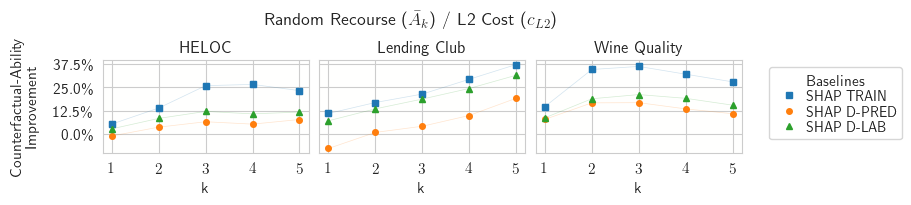

Dataset                      HELOC                         Lending Club        \
k                                1     2     3     4     5            1     2   
Method           Baseline                                                       
CF-SHAP $100$-NN SHAP D-LAB    2.8   8.4  12.1  10.8  11.8          7.1  13.5   
                 SHAP D-PRED  -1.0   3.7   6.6   5.3   7.8         -7.8   0.8   
                 SHAP TRAIN    5.4  14.0  26.0  26.6  23.3         11.0  16.9   

Dataset                                        Wine Quality                    \
k                                3     4     5            1     2     3     4   
Method           Baseline                                                       
CF-SHAP $100$-NN SHAP D-LAB   18.8  24.4  31.5          8.7  18.9  21.2  19.2   
                 SHAP D-PRED   4.2   9.9  19.2          7.9  16.7  16.8  13.5   
                 SHAP TRAIN   21.4  29.4  37.3         14.8  34.6  36.3  32.1   

Dataset                             
k                                5  
Method           Baseline           
CF-SHAP $100$-NN SHAP D-LAB   15.5  
                 SHAP D-PRED  10.9  
                 SHAP TRAIN   28.0

In [29]:
# Settings
KWARGS['metric_name'] = 'Counterfactual-Ability\nImprovement'
KWARGS_PLOT['y'] = KWARGS['metric_name']

# DataFrame
df_ = generate_dataframe_to_plot(
    pivot_sig2, prop2, prop_ci2, 
    fixed_features = ('quantile_sum', 'L2', 'random', 'quantile', 'L2', None), 
    feature_names = FEATURE_NAMES_COSTS,
    **KWARGS
)
df_['Setting'] = 'Random Recourse ($\\bar{A}_k$) / L2 Cost ($c_{L2}$)'
df_ = df_[(df_['Decision Boundary'] == 'All')]
df_ = df_[df_['Dataset'].apply(lambda x : 'GMSC' not in x)]
df_['Dataset'] = df_['Dataset'].apply(lambda x : x.split('(')[0][:-1])
print_nonunique_cols(df_, ['CI', KWARGS['metric_name']])

# Plot
camera_figure(df_, filename = 'costs_random_l2_2', **KWARGS_PLOT)

Baseline ['SHAP TRAIN' 'SHAP D-PRED' 'SHAP D-LAB']
k [1 2 3 4 5]
Dataset ['HELOC' 'Lending Club' 'Wine Quality']


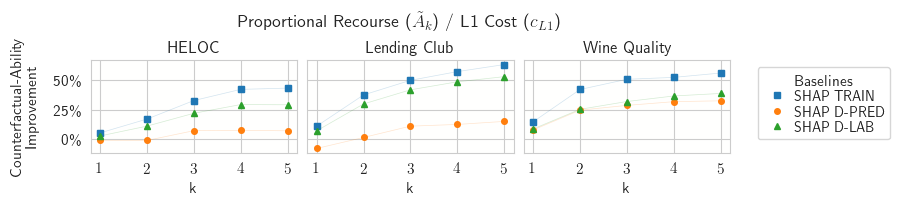

Dataset                      HELOC                         Lending Club        \
k                                1     2     3     4     5            1     2   
Method           Baseline                                                       
CF-SHAP $100$-NN SHAP D-LAB    2.8  11.1  21.9  29.2  29.1          7.1  29.8   
                 SHAP D-PRED  -1.0  -1.0   7.2   7.5   7.2         -7.8   1.5   
                 SHAP TRAIN    5.4  17.0  32.6  42.1  43.2         11.0  37.4   

Dataset                                        Wine Quality                    \
k                                3     4     5            1     2     3     4   
Method           Baseline                                                       
CF-SHAP $100$-NN SHAP D-LAB   41.7  48.4  52.8          8.7  25.3  31.8  36.5   
                 SHAP D-PRED  11.0  12.5  15.0          7.9  24.6  28.6  31.7   
                 SHAP TRAIN   49.7  57.0  63.0         14.8  42.0  50.6  52.2   

Dataset                             
k                                5  
Method           Baseline           
CF-SHAP $100$-NN SHAP D-LAB   38.7  
                 SHAP D-PRED  32.4  
                 SHAP TRAIN   55.9

In [30]:
# Settings
KWARGS['metric_name'] = 'Counterfactual-Ability\nImprovement'
KWARGS_PLOT['y'] = KWARGS['metric_name']

# DataFrame
df_ = generate_dataframe_to_plot(
    pivot_sig2, prop2, prop_ci2, 
    fixed_features = ('quantile_sum', 'L1', 'proportional', 'quantile', 'L1', None), 
    feature_names = FEATURE_NAMES_COSTS,
    **KWARGS
)
df_['Setting'] = 'Proportional Recourse ($\\tilde{A}_{k}$) / L1 Cost ($c_{L1}$)'
df_ = df_[(df_['Decision Boundary'] == 'All')]
df_ = df_[df_['Dataset'].apply(lambda x : 'GMSC' not in x)]
df_['Dataset'] = df_['Dataset'].apply(lambda x : x.split('(')[0][:-1])
print_nonunique_cols(df_, ['CI', KWARGS['metric_name']])

# Plot
camera_figure(df_, filename = 'costs_proportional_l1_2', **KWARGS_PLOT)

Baseline ['SHAP TRAIN' 'SHAP D-PRED' 'SHAP D-LAB']
k [1 2 3 4 5]
Dataset ['HELOC' 'Lending Club' 'Wine Quality']


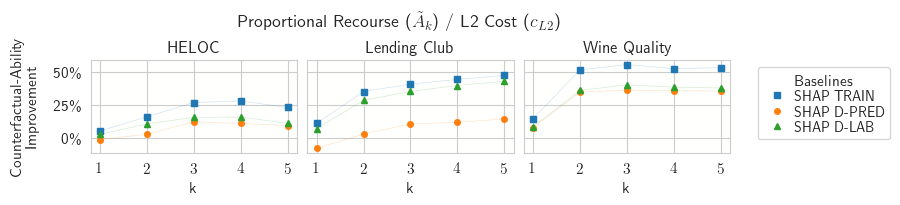

Dataset                      HELOC                         Lending Club        \
k                                1     2     3     4     5            1     2   
Method           Baseline                                                       
CF-SHAP $100$-NN SHAP D-LAB    2.8  10.7  15.6  15.8  11.2          7.1  28.4   
                 SHAP D-PRED  -1.0   2.9  12.2  11.0   9.4         -7.8   3.2   
                 SHAP TRAIN    5.4  16.1  26.8  28.0  23.1         11.0  35.0   

Dataset                                        Wine Quality                    \
k                                3     4     5            1     2     3     4   
Method           Baseline                                                       
CF-SHAP $100$-NN SHAP D-LAB   35.1  39.6  42.8          8.7  35.9  40.1  38.4   
                 SHAP D-PRED  10.6  12.0  14.4          7.9  34.6  36.1  35.7   
                 SHAP TRAIN   40.7  44.2  47.2         14.8  51.3  55.3  52.3   

Dataset                             
k                                5  
Method           Baseline           
CF-SHAP $100$-NN SHAP D-LAB   37.7  
                 SHAP D-PRED  35.4  
                 SHAP TRAIN   53.1

In [31]:
# Settings
KWARGS['metric_name'] = 'Counterfactual-Ability\nImprovement'
KWARGS_PLOT['y'] = KWARGS['metric_name']

# DataFrame
df_ = generate_dataframe_to_plot(
    pivot_sig2, prop2, prop_ci2, 
    fixed_features = ('quantile_sum', 'L2', 'proportional', 'quantile', 'L2', None), 
    feature_names = FEATURE_NAMES_COSTS,
    **KWARGS
)
df_['Setting'] = 'Proportional Recourse ($\\tilde{A}_{k}$) / L2 Cost ($c_{L2}$)'
df_ = df_[(df_['Decision Boundary'] == 'All')]
df_ = df_[df_['Dataset'].apply(lambda x : 'GMSC' not in x)]
df_['Dataset'] = df_['Dataset'].apply(lambda x : x.split('(')[0][:-1])
print_nonunique_cols(df_, ['CI', KWARGS['metric_name']])

# Plot
camera_figure(df_, filename = 'costs_proportional_l2_2', **KWARGS_PLOT)

##### Plausibility

Baseline ['SHAP TRAIN' 'SHAP D-PRED' 'SHAP D-LAB']
k [1 2 3 4 5]
Dataset ['HELOC' 'Lending Club' 'Wine Quality']


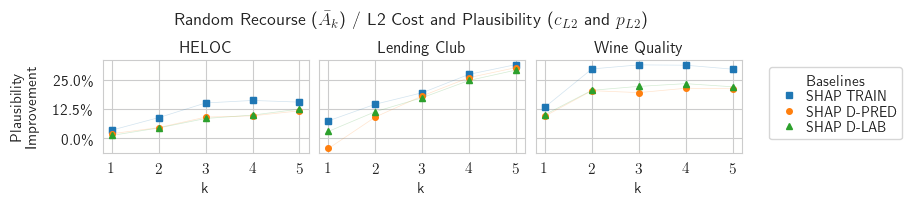

Dataset                      HELOC                        Lending Club        \
k                                1    2     3     4     5            1     2   
Method           Baseline                                                      
CF-SHAP $100$-NN SHAP D-LAB    1.3  4.5   8.6  10.0  12.6          3.0  11.5   
                 SHAP D-PRED   2.1  4.7   9.2   9.7  11.8         -4.3   9.2   
                 SHAP TRAIN    3.6  9.0  15.2  16.3  15.6          7.6  14.7   

Dataset                                        Wine Quality                    \
k                                3     4     5            1     2     3     4   
Method           Baseline                                                       
CF-SHAP $100$-NN SHAP D-LAB   17.5  24.9  29.3         10.2  20.7  22.3  23.5   
                 SHAP D-PRED  18.2  26.1  30.4          9.6  20.5  19.7  21.5   
                 SHAP TRAIN   19.6  27.5  31.7         13.5  29.8  31.5  31.4   

Dataset                             
k                                5  
Method           Baseline           
CF-SHAP $100$-NN SHAP D-LAB   22.2  
                 SHAP D-PRED  21.3  
                 SHAP TRAIN   29.7

In [32]:
# Settings
KWARGS['metric_name'] = 'Plausibility\nImprovement'
KWARGS_PLOT['y'] = KWARGS['metric_name']

# DataFrame
df_ = generate_dataframe_to_plot(
    pivot_sig_nn2, prop_nn2, prop_ci_nn2,
    fixed_features = ('quantile_sum', 'L2', 'random', 'quantile', 'L2', 5, None), 
    feature_names = FEATURE_NAMES_NN,
    **KWARGS
)
df_['Setting'] = 'Random Recourse ($\\bar{A}_k$) / L2 Cost and Plausibility ($c_{L2}$ and $p_{L2}$)'
df_ = df_[(df_['Decision Boundary'] == 'All')]
df_ = df_[df_['Dataset'].apply(lambda x : 'GMSC' not in x)]
df_['Dataset'] = df_['Dataset'].apply(lambda x : x.split('(')[0][:-1])
print_nonunique_cols(df_, ['CI', KWARGS['metric_name']])

# Plot
camera_figure(df_, filename = 'plausability_random_l2_2', **KWARGS_PLOT)

Baseline ['SHAP TRAIN' 'SHAP D-PRED' 'SHAP D-LAB']
k [1 2 3 4 5]
Dataset ['HELOC' 'Lending Club' 'Wine Quality']


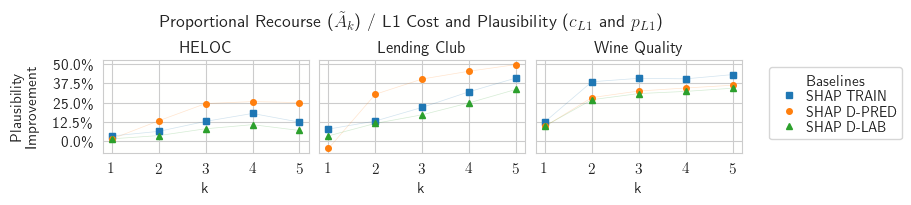

Dataset                      HELOC                         Lending Club        \
k                                1     2     3     4     5            1     2   
Method           Baseline                                                       
CF-SHAP $100$-NN SHAP D-LAB    1.6   3.7   8.1  10.8   7.0          3.5  11.6   
                 SHAP D-PRED   1.5  13.3  24.4  25.7  25.0         -4.7  30.4   
                 SHAP TRAIN    3.4   6.4  12.9  18.0  12.4          7.9  13.1   

Dataset                                        Wine Quality                    \
k                                3     4     5            1     2     3     4   
Method           Baseline                                                       
CF-SHAP $100$-NN SHAP D-LAB   17.2  24.9  33.6          9.9  26.9  30.9  32.3   
                 SHAP D-PRED  40.4  45.4  49.7          9.7  28.3  32.6  34.5   
                 SHAP TRAIN   22.0  32.1  41.0         12.7  38.6  40.8  40.5   

Dataset                             
k                                5  
Method           Baseline           
CF-SHAP $100$-NN SHAP D-LAB   34.4  
                 SHAP D-PRED  36.3  
                 SHAP TRAIN   43.2

In [33]:
# Settings
KWARGS['metric_name'] = 'Plausibility\nImprovement'
KWARGS_PLOT['y'] = KWARGS['metric_name']

# DataFrame
df_ = generate_dataframe_to_plot(
    pivot_sig_nn2, prop_nn2, prop_ci_nn2,
    fixed_features = ('quantile_sum', 'L1', 'proportional', 'quantile', 'L1', 5, None), 
    feature_names = FEATURE_NAMES_NN,
    **KWARGS
)
df_['Setting'] = 'Proportional Recourse ($\\tilde{A}_{k}$) / L1 Cost and Plausibility ($c_{L1}$ and $p_{L1}$)'
df_ = df_[(df_['Decision Boundary'] == 'All')]
df_ = df_[df_['Dataset'].apply(lambda x : 'GMSC' not in x)]
df_['Dataset'] = df_['Dataset'].apply(lambda x : x.split('(')[0][:-1])
print_nonunique_cols(df_, ['CI', KWARGS['metric_name']])

# Plot
camera_figure(df_, filename = 'plausability_proportional_l1_2', **KWARGS_PLOT)

Baseline ['SHAP TRAIN' 'SHAP D-PRED' 'SHAP D-LAB']
k [1 2 3 4 5]
Dataset ['HELOC' 'Lending Club' 'Wine Quality']


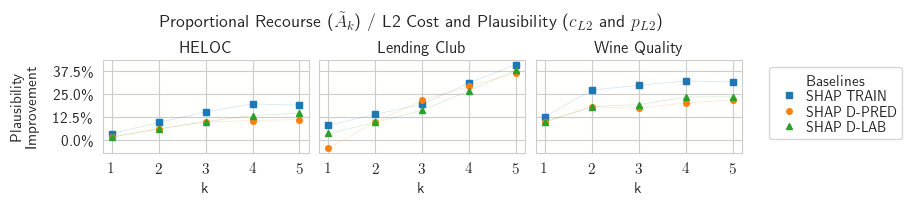

Dataset                      HELOC                        Lending Club        \
k                                1    2     3     4     5            1     2   
Method           Baseline                                                      
CF-SHAP $100$-NN SHAP D-LAB    1.6  5.9   9.9  13.2  14.6          3.5   9.4   
                 SHAP D-PRED   1.5  6.1   9.8  10.5  11.0         -4.7   9.6   
                 SHAP TRAIN    3.4  9.5  15.2  19.6  18.8          7.9  13.9   

Dataset                                        Wine Quality                    \
k                                3     4     5            1     2     3     4   
Method           Baseline                                                       
CF-SHAP $100$-NN SHAP D-LAB   16.1  26.7  37.8          9.9  18.1  19.2  23.3   
                 SHAP D-PRED  21.5  29.1  36.4          9.7  17.9  17.2  20.1   
                 SHAP TRAIN   19.4  31.0  40.9         12.7  27.1  29.6  32.1   

Dataset                             
k                                5  
Method           Baseline           
CF-SHAP $100$-NN SHAP D-LAB   23.4  
                 SHAP D-PRED  21.8  
                 SHAP TRAIN   31.5

In [34]:
# Settings
KWARGS['metric_name'] = 'Plausibility\nImprovement'
KWARGS_PLOT['y'] = KWARGS['metric_name']

# DataFrame
df_ = generate_dataframe_to_plot(
    pivot_sig_nn2, prop_nn2, prop_ci_nn2,
    feature_names = FEATURE_NAMES_NN,
    fixed_features = ('quantile_sum', 'L2', 'random', 'quantile', 'L1', 5, None), **KWARGS
)
df_['Setting'] = 'Proportional Recourse ($\\tilde{A}_{k}$) / L2 Cost and Plausibility ($c_{L2}$ and $p_{L2}$)'
df_ = df_[(df_['Decision Boundary'] == 'All')]
df_ = df_[df_['Dataset'].apply(lambda x : 'GMSC' not in x)]
df_['Dataset'] = df_['Dataset'].apply(lambda x : x.split('(')[0][:-1])
print_nonunique_cols(df_, ['CI', KWARGS['metric_name']])

# Plot
camera_figure(df_, filename = 'plausability_proportional_l2_2', **KWARGS_PLOT)

## Appendix - Effect of $K$

In [35]:
# Let's select what method we want to plot
KWARGS = dict(
    selected_baselines_tuples=[
        ('SHAP', 'diff_pred_100', 'global'),
    ],
    selected_methods_tuples=[
        ('SHAP', 'knn1_qL1', 'local'),
        ('SHAP', 'knn3_qL1', 'local'),
        ('SHAP', 'knn5_qL1', 'local'),
        ('SHAP', 'knn10_qL1', 'local'),
        ('SHAP', 'knn20_qL1', 'local'),
        ('SHAP', 'knn50_qL1', 'local'),
        ('SHAP', 'knn100_qL1', 'local'),
        ('SHAP', 'knn250_qL1', 'local'),
        ('SHAP', 'knn500_qL1', 'local'),
        ('SHAP', 'knn1000_qL1', 'local'),
    ],
    method_details = False,
)

Method ['CF-SHAP $1$-NN' 'CF-SHAP $3$-NN' 'CF-SHAP $5$-NN' 'CF-SHAP $10$-NN'
 'CF-SHAP $20$-NN' 'CF-SHAP $50$-NN' 'CF-SHAP $100$-NN' 'CF-SHAP $250$-NN'
 'CF-SHAP $500$-NN' 'CF-SHAP $1000$-NN']
k [1 2 3 4 5]
Dataset ['HELOC' 'Lending Club' 'Wine Quality']


/home/ubuntu/anaconda3/envs/cfshap22/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning:




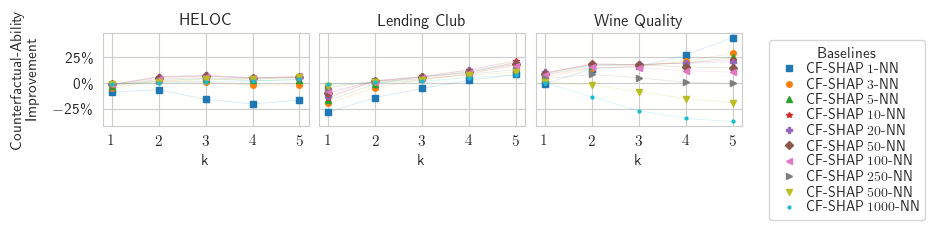

Dataset           HELOC                        Lending Club                   \
k                     1    2     3     4     5            1     2    3     4   
Method                                                                         
CF-SHAP $1$-NN     -8.6 -6.2 -15.6 -20.0 -16.4        -28.0 -13.8 -5.0   2.9   
CF-SHAP $10$-NN    -1.9  6.4   7.0   4.7   5.5        -14.0   2.4  6.7  13.0   
CF-SHAP $100$-NN   -1.0  3.7   6.3   5.1   6.6         -7.8   1.6  5.0   9.8   
CF-SHAP $1000$-NN  -0.7  0.5   1.6   2.2   3.7         -1.2   0.8  1.8   5.5   
CF-SHAP $20$-NN    -1.0  6.4   8.0   5.4   5.4        -12.2   2.1  6.2  12.4   
CF-SHAP $250$-NN   -1.1  2.0   4.7   4.6   6.0         -4.4   2.1  3.9   8.9   
CF-SHAP $3$-NN     -4.9  2.4   1.0  -2.0  -1.6        -19.2  -4.2  3.8   8.8   
CF-SHAP $5$-NN     -3.1  3.9   4.2   2.7   3.3        -16.6  -0.6  6.6  10.2   
CF-SHAP $50$-NN    -1.0  5.2   7.2   5.3   6.4         -9.5   2.4  5.7  11.2   
CF-SHAP $500$-NN   -1.2  1.4   3.7   4.0   5.8         -2.7   1.2  3.2   8.1   

Dataset                 Wine Quality                          
k                     5            1     2     3     4     5  
Method                                                        
CF-SHAP $1$-NN      8.6         -0.4  13.9  16.2  27.3  44.3  
CF-SHAP $10$-NN    21.6          9.6  19.0  17.9  19.9  22.7  
CF-SHAP $100$-NN   17.1          7.9  15.3  15.2  12.3  10.7  
CF-SHAP $1000$-NN   7.7          0.7 -13.2 -26.6 -34.1 -37.0  
CF-SHAP $20$-NN    19.5         10.5  18.0  18.3  19.2  20.6  
CF-SHAP $250$-NN   13.2          4.6   8.6   5.2   0.9  -0.1  
CF-SHAP $3$-NN     18.3          6.1  14.6  16.9  21.3  28.9  
CF-SHAP $5$-NN     20.3          8.2  17.2  17.7  19.6  25.1  
CF-SHAP $50$-NN    18.4          9.4  18.3  17.8  15.7  15.2  
CF-SHAP $500$-NN   10.6          1.2  -1.6  -8.2 -14.8 -18.9

In [36]:
# Settings
KWARGS['metric_name'] = 'Counterfactual-Ability\nImprovement'
KWARGS_PLOT = dict(
    y = KWARGS['metric_name'],
    figure=None,
    style="Method", #"Decision Boundary",
    hue="Method",
    col='Dataset',
    detached_legend=False,
    ret_table=True,
)

# DataFrame
df_ = generate_dataframe_to_plot(
    pivot_sig2, prop2, prop_ci2, 
    fixed_features = ('quantile_sum', 'L1', 'random', 'quantile', 'L1', None), 
    feature_names = FEATURE_NAMES_COSTS,
    **KWARGS
)
df_ = df_[(df_['Decision Boundary'] == 'All')]
df_ = df_[df_['Dataset'].apply(lambda x : 'GMSC' not in x)]
df_['Dataset'] = df_['Dataset'].apply(lambda x : x.split('(')[0][:-1])
print_nonunique_cols(df_, ['CI', KWARGS['metric_name']])

# Plot
tables = camera_figure(df_, filename = 'costs_effect_of_K', **KWARGS_PLOT)

In [37]:
table_ = tables[0].reset_index()
table_.insert(0, '$K$', table_['Method'].apply(lambda x : int(x.split(' ')[1].split('-')[0][1:-1])))
table_ = table_.sort_values(['$K$'], ascending = True).reset_index(drop=True)
# del table_['Sort Method']


table_['Method'] = ''

table_.rename(columns = {i: f"${i}$" for i in range(6)}, inplace = True)
max_row = table_.max()

for c in table_:
    if "$" in c[1]:
        table_[c] = table_[c].apply(lambda x : "\!\!$\\bm{" + f"{x:.1f}" + "}$\!\!" if x == max_row[c] else f"\!\!${x:.1f}$\!\!")
table_

Dataset   $K$ Method                HELOC                      \
k                                     $1$                 $2$   
0           1              \!\!$-8.6$\!\!      \!\!$-6.2$\!\!   
1           3              \!\!$-4.9$\!\!       \!\!$2.4$\!\!   
2           5              \!\!$-3.1$\!\!       \!\!$3.9$\!\!   
3          10              \!\!$-1.9$\!\!  \!\!$\bm{6.4}$\!\!   
4          20              \!\!$-1.0$\!\!  \!\!$\bm{6.4}$\!\!   
5          50              \!\!$-1.0$\!\!       \!\!$5.2$\!\!   
6         100              \!\!$-1.0$\!\!       \!\!$3.7$\!\!   
7         250              \!\!$-1.1$\!\!       \!\!$2.0$\!\!   
8         500              \!\!$-1.2$\!\!       \!\!$1.4$\!\!   
9        1000         \!\!$\bm{-0.7}$\!\!       \!\!$0.5$\!\!   

Dataset                                                              \
k                       $3$                 $4$                 $5$   
0           \!\!$-15.6$\!\!     \!\!$-20.0$\!\!     \!\!$-16.4$\!\!   
1             \!\!$1.0$\!\!      \!\!$-2.0$\!\!      \!\!$-1.6$\!\!   
2             \!\!$4.2$\!\!       \!\!$2.7$\!\!       \!\!$3.3$\!\!   
3             \!\!$7.0$\!\!       \!\!$4.7$\!\!       \!\!$5.5$\!\!   
4        \!\!$\bm{8.0}$\!\!  \!\!$\bm{5.4}$\!\!       \!\!$5.4$\!\!   
5             \!\!$7.2$\!\!       \!\!$5.3$\!\!       \!\!$6.4$\!\!   
6             \!\!$6.3$\!\!       \!\!$5.1$\!\!  \!\!$\bm{6.6}$\!\!   
7             \!\!$4.7$\!\!       \!\!$4.6$\!\!       \!\!$6.0$\!\!   
8             \!\!$3.7$\!\!       \!\!$4.0$\!\!       \!\!$5.8$\!\!   
9             \!\!$1.6$\!\!       \!\!$2.2$\!\!       \!\!$3.7$\!\!   

Dataset         Lending Club                                          \
k                        $1$                 $2$                 $3$   
0            \!\!$-28.0$\!\!     \!\!$-13.8$\!\!      \!\!$-5.0$\!\!   
1            \!\!$-19.2$\!\!      \!\!$-4.2$\!\!       \!\!$3.8$\!\!   
2            \!\!$-16.6$\!\!      \!\!$-0.6$\!\!       \!\!$6.6$\!\!   
3            \!\!$-14.0$\!\!  \!\!$\bm{2.4}$\!\!  \!\!$\bm{6.7}$\!\!   
4            \!\!$-12.2$\!\!       \!\!$2.1$\!\!       \!\!$6.2$\!\!   
5             \!\!$-9.5$\!\!  \!\!$\bm{2.4}$\!\!       \!\!$5.7$\!\!   
6             \!\!$-7.8$\!\!       \!\!$1.6$\!\!       \!\!$5.0$\!\!   
7             \!\!$-4.4$\!\!       \!\!$2.1$\!\!       \!\!$3.9$\!\!   
8             \!\!$-2.7$\!\!       \!\!$1.2$\!\!       \!\!$3.2$\!\!   
9        \!\!$\bm{-1.2}$\!\!       \!\!$0.8$\!\!       \!\!$1.8$\!\!   

Dataset                                                   Wine Quality  \
k                        $4$                  $5$                  $1$   
0              \!\!$2.9$\!\!        \!\!$8.6$\!\!       \!\!$-0.4$\!\!   
1              \!\!$8.8$\!\!       \!\!$18.3$\!\!        \!\!$6.1$\!\!   
2             \!\!$10.2$\!\!       \!\!$20.3$\!\!        \!\!$8.2$\!\!   
3        \!\!$\bm{13.0}$\!\!  \!\!$\bm{21.6}$\!\!        \!\!$9.6$\!\!   
4             \!\!$12.4$\!\!       \!\!$19.5$\!\!  \!\!$\bm{10.5}$\!\!   
5             \!\!$11.2$\!\!       \!\!$18.4$\!\!        \!\!$9.4$\!\!   
6              \!\!$9.8$\!\!       \!\!$17.1$\!\!        \!\!$7.9$\!\!   
7              \!\!$8.9$\!\!       \!\!$13.2$\!\!        \!\!$4.6$\!\!   
8              \!\!$8.1$\!\!       \!\!$10.6$\!\!        \!\!$1.2$\!\!   
9              \!\!$5.5$\!\!        \!\!$7.7$\!\!        \!\!$0.7$\!\!   

Dataset                                                                 \
k                        $2$                  $3$                  $4$   
0             \!\!$13.9$\!\!       \!\!$16.2$\!\!  \!\!$\bm{27.3}$\!\!   
1             \!\!$14.6$\!\!       \!\!$16.9$\!\!       \!\!$21.3$\!\!   
2             \!\!$17.2$\!\!       \!\!$17.7$\!\!       \!\!$19.6$\!\!   
3        \!\!$\bm{19.0}$\!\!       \!\!$17.9$\!\!       \!\!$19.9$\!\!   
4             \!\!$18.0$\!\!  \!\!$\bm{18.3}$\!\!       \!\!$19.2$\!\!   
5             \!\!$18.3$\!\!       \!\!$17.8$\!\!       \!\!$15.7$\!\!   
6             \!\!$1

In [38]:
print(table_.to_latex(escape=False, index = False))

\begin{tabular}{rllllllllllllllll}
\toprule
  $K$ & Method & \multicolumn{5}{l}{HELOC} & \multicolumn{5}{l}{Lending Club} & \multicolumn{5}{l}{Wine Quality} \\
      &                  $1$ &                 $2$ &                 $3$ &                 $4$ &                 $5$ &                  $1$ &                 $2$ &                 $3$ &                  $4$ &                  $5$ &                  $1$ &                  $2$ &                  $3$ &                  $4$ &                  $5$ \\
\midrule
    1 &        &       \!\!$-8.6$\!\! &      \!\!$-6.2$\!\! &     \!\!$-15.6$\!\! &     \!\!$-20.0$\!\! &     \!\!$-16.4$\!\! &      \!\!$-28.0$\!\! &     \!\!$-13.8$\!\! &      \!\!$-5.0$\!\! &        \!\!$2.9$\!\! &        \!\!$8.6$\!\! &       \!\!$-0.4$\!\! &       \!\!$13.9$\!\! &       \!\!$16.2$\!\! &  \!\!$\bm{27.3}$\!\! &  \!\!$\bm{44.3}$\!\! \\
    3 &        &       \!\!$-4.9$\!\! &       \!\!$2.4$\!\! &       \!\!$1.0$\!\! &      \!\!$-2.0$\!\! &      \!\!$-1.6$\!\! 